
# Projet optimisation 

_Gr4-Chesneaux-Plessix_

## Modélisation

Dans ce sujet, on cherche à chauffer un bâtiment résidentiel de sorte à minimiser la facture électrique du consommateur, tout en garantissant le  confot des occupants.

### 1. Ecrire la fonction objectif

L'objectif global est de minimiser la facture des occupants de la maison, cela revient à minimiser la fonction suivante.
$$\boxed{P(t)= \int_{t_0}^{t}{p}^{p/c}(t)w(t).dt}$$
- $t_0$ le temps initial
- $w(t)$ la charge souscrite à $t$
- $p_i^{p/c}(t)$ le prix de l'énergie à $t$ suivant si $t$ correspond à une heure pleine ou une heure creuse.
- $P(t)$ le montant de la facture entre $t_0$ et $t$ pour une consommation suivant la charge $w$ au prix $p$

### 2. Modélisation dynamique de la température du bâtiment

On va considérer la maison comme un cube d'arrête $a$, et de face de surface $S=a^2$. On considère alors que les murs sont assez fins par rapport à la taille de l'édifice général pour que l'on puisse considérer la surface intérieure comme égale à la surface extérieure du cube. On alors $S_{ext} = S_{int} = 5.S_{mur}$ (on considère qu'il n'y pas d'échange maison-sol). On suppose que les variations de températures sont quasistatiques.

> Les principales sources de perturbation extérieures de la température sont, **l'apport d'énergie par le soleil** par rayonnement , et **l'appport par le chauffage**, on compte aussi en négatif **la perte d'energie au niveau des murs**.


Notons :
- $t$ le temps
- $T_{int}(t)$ la température de la maison supposée homogène
- $T_{ext}(t)$ la température extérieure
- $T_s(t)$ la température à la surface extérieure de la maison
- $\Phi_s(t)$ le flux solaire moyen($W/m^2$)
- $Q_{chauff}(t)$ la chaleur produite par le chauffage
- $\Phi_{pertes}(t)$ le flux émis de l'intérieur vers l'extérieur 

On peut associer aux murs de la maison une résistance thermique telle que $\Delta_{int\to ext} = R_{th}\Phi_{pertes}$. Par exemple la résistance est donnée par $R_{th} = \frac{e}{\lambda S_{ext}}$ dans le cadre unidimensionnel. 
On considère que dans la maison l'air est brassé et que donc la température homogène et le régime permanent atteint instantanément.


![Title](modele.JPG)

#### _**Modèle Physique**_

Si l'on considère une petite transformation pendant $dt$. 
L'écriture du premier principe à la maison $\Sigma = { \ air \ à \ l'intérieur}$  nous donne :
$$dU = C_{m}dT = Q_{chauffage} + Q_{Rayonnement} - Q_{Pertes}$$
On néglige $Q_{anthropique}$.
$$C_{m}dT = w(t)dt + \alpha \Phi_sS_{ext}dt + \frac{T_{ext}-T}{R_{th}}dt$$
d'où:

$$\boxed{\frac{dT}{dt} + \frac{T}{R_{th}C_{m}} =\frac{1}{C_{m}}\Bigg[w(t) +\alpha \Phi_sS_{ext} +\frac{T_{ext}}{R_{th}}  \Bigg]}$$

### 3. Discrétisation du problème 

Dans le cadre général en notant $T_i = T(\tau i)$, si $\tau$ est suffisament petit devant les durées de variation de $w$, $\Phi_s$ et $T$  on peut écrire :
$$\boxed{\Delta T= T_{i+1}-T_{i}=\frac{\tau}{C_{m}}[w(i\tau) +\alpha \Phi_s(\tau i )S_{ext} + \frac{T_{ext}(\tau i )-T_i}{R_{th}}]} \ \ - \ \ (E)$$

Dans le cadre des données fournies sur $OASIS$. on a $\forall t, w(t) = 0$.
D'où :
$$\Delta T= T_{i+1}-T_{i}=\frac{\tau}{C_{m}}[\alpha \Phi_s(\tau i )S_{ext} + \frac{T_{ext}(\tau i )-T_i}{R_{th}}]$$

Or si on fait l'hyphothèse d'une maison cubique de volume $V = S^{\frac{3}{2}}$. Or $C_m = C_{massique}\rho_{air}V =  C_{massique}\rho_{air}S^{\frac{3}{2}}$. 
D'où $S = (\frac{C_m}{C_{massique}\rho_{air}})^{\frac{2}{3}}$

Or on a $C_{massique} = 1004  J.K^{-1}kg^{-1}$ et $\rho_{air} = 1 \ kg.m^{-3}$
- On remarque que on connait l'évolution temporelle de la  température de la maison pour $W(t)=0$, ainsi que de la température extéireure et l'ensoleillemnent associé
- Les paramètres de notre problème sont :
    - La longueur d'un côté $a$
    - La résistance surfacique thermiques des murs, qui conditionne l'épaisseur des murs.
    - La résistance thermique de l'ensemble de la maison.
    - La part $\alpha$ du flux solaire arrivant à chauffer l'air de la maison. 
    - La capacité de la maison $C_m$

- Cependant on décompte uniquement 3 variables signicatives que sont : $R_{surf},\alpha\ et\ S_ext$. En effet :
  - $R_{surf} = R_{th}.S_{ext}$ (On considère $R_surf$ pour pouvoir juger rapidement de la faisabilité de l'épaisseur des murs modélisés, et donc de la cohérence du modèle)
  - $C_m = C_{massique}\rho_{air}a^3$
  - $a = \sqrt{S_{ext}/5}$

- On cherche donc les paramètres qui permettent d'approcher les différentes valeurs par une fonction respectant l'equation différentielle présentée plus haut.
- > **Hypothèse** : On va supposer que la constante de discrétisation $\tau$ est très petite devant la constante de temps du modèle $\delta$. Par ailleurs $w$ et $\Phi_s et T_{ext}$ étant mesurée toutes les 30 minutes, on va les supposer constant sur cette durée, et donc ne contraignent en rien la valeur de $\tau$
- Pour trouver les paramètres significatifs on effectue une regression lineaire en utilisant la méthode des moindres carrés. Cela revient à résoudre le problème d'optimisation suivant, en notant $T,w,\Phi_s, T_{ext}, \Delta T$ les vecteurs de valeurs corespondantes aux temps d'observations : 
$$
\min_{\alpha,S_{ext}, R_{surf} \in \mathbb{R}_+^3} {||{\frac{\tau}{C_{m}}[w +\alpha \Phi_sS_{ext} + \frac{(T_{ext}-T)S_{ext}}{R_{surf}}]-\Delta T}||}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

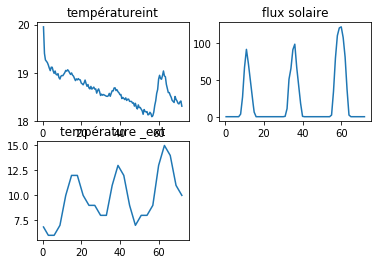

In [2]:
# Extraction des données
data = np.loadtxt('donnees-projet-gr4.txt')
heure = data.transpose()[0]
T_int = data.transpose()[1]
phi_sol = data.transpose()[2]
T_ext = data.transpose()[3]
plt.subplot((221))
plt.plot(heure,T_int)
plt.title('températureint')
plt.subplot((222))
plt.plot(heure,phi_sol)
plt.title('flux solaire')
plt.subplot(223)
plt.plot(heure,T_ext)
plt.title('température _ext')
#Création du vecteur des différences   
diff = []
for i in range (1, len(T_int)):
    diff.append(T_int[i]-T_int[i-1])
diff  = np.array(diff)

diff = diff[1:]# On enlève les premières données pour qui faussent la régression
T_int =T_int[2:]# On enlève les données inutilisables à cause de la taille inférieure du vecteur différence
phi_sol = phi_sol[2:]
T_ext = T_ext[2:]
heure = heure[2:]

In [3]:
# Création de notre modèle Fonction qui trace l'évolution de la température en fonction des paramètres
# Méthode d'euler

def mod1(T_0,T_ext, Phi_sol,tau,R,C,alpha,S_ext):
    a = (S_ext/5)**(1/2)
    V = a**3 # volume de la maison
    C = 1256*V # On considère la maison remplie uniquement d'air
    model = [T_0] # On initialise à une température T_0 indépendante des approximations de mesures
    for i in range(1,len(T_ext)):
        diff =(3600*tau/C)*((alpha*Phi_sol[i])*S_ext - (model[-1] - T_ext[i])*S_ext/R)
        model.append(model[-1] + diff)
    return model

In [4]:
#modèle en supposant T_int connus et exactes
# S'approche plus exactement de l'approximation que fait l'algortihme
def mod2(T_0,T_ext, Phi_sol,tau,R,C,alpha,S_ext):
    a = (S_ext/5)**(1/2)
    V = a**3 # volume de la maison
    C = 1256*V # On considère la maison remplie uniquement d'air
    model = [T_0] # On initialise à une température T_0 indépendante des approximations de mesures
    for i in range(0,len(T_ext)-1):
        diff =(3600*tau/C)*((alpha*Phi_sol[i])*S_ext - (T_int - T_ext[i])*S_ext/R)
        model.append(T_int[i] + diff)
    return model

In [5]:
#Fonction de résidu
# X = [alpha, R_surf, S_ext]

def f(x):
    alpha = x[0]
    R = x[1]
    S_ext = x[2]
    tau = 0.5
    a = np.sqrt(S_ext/5)
    V = a**3 # volume de la maison
    C = 1256*V # On considère la maison remplie uniquement d'air
    
    return (3600*tau/C)*((alpha*phi_sol*S_ext) - (T_int - T_ext)*S_ext/R)-diff


In [6]:
# Moindres carrés linéaires
print(len(diff))
res = optimize.least_squares(f,[0.1,10,100], verbose=1, method ='trf')
residual = res.fun
alpha, R, S_ext = res.x
a = np.sqrt(S_ext/5)
V = (a**3)  
C = 1256*V
#######################################

print('===== \n')
print(' MODELISATION DE LA MAISON \n ')
print('Murs de résistance équivalente', R/(S_ext),'\n')
print('Surface extérieure', S_ext,'m² \n')
print('Cube de côté a :', np.sqrt(S_ext/5), 'm','\n')
print('Mur de résistance surfacique',R,'m^2KW^-1\n') 
print('Pourcentage du flux solaire chauffant la maison', alpha,'\n')
print('Capacité thermique de la maison', C,'JK^-1\n')



142
`ftol` termination condition is satisfied.
Function evaluations 22, initial cost 2.6349e+03, final cost 1.8435e-01, first-order optimality 1.98e-05.
===== 

 MODELISATION DE LA MAISON 
 
Murs de résistance équivalente 1.3505426600404253 

Surface extérieure 301.23236459801774 m² 

Cube de côté a : 7.7618601455838885 m 

Mur de résistance surfacique 406.8271589744741 m^2KW^-1

Pourcentage du flux solaire chauffant la maison 0.0007411307540039446 

Capacité thermique de la maison 587336.6195157372 JK^-1



Text(0.5, 1.0, 'Valeurs exp et modélisation')

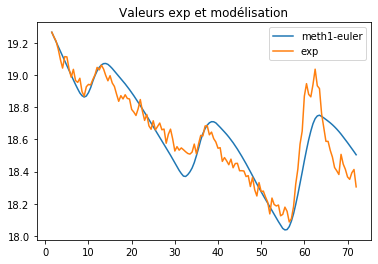

In [7]:
# Vérification visuelle de la validité du modèle
# On suppose que la première valeur est exacte
# C'est pour cela que l'on a mis de coté la première valeur du jeu de données
model1 =  mod1(T_int[0],T_ext, phi_sol,0.5,R,C,alpha,S_ext)
plt.plot(heure,model1, label = "meth1-euler")
plt.plot(heure,T_int, label = 'exp')
plt.legend()
plt.title('Valeurs exp et modélisation')


> On a ici choisit la méthode dite `trf`, car celle-ci parcourt tout l'espace pour déterminer la solution optimale, cela permet dans le cas où il y'a de nombreux minimas locaux, de cherche l'extremum global dans tout l'espace. 

On voit après calcul que le produit $RC_m$ est très grand devant $\tau$. Donc la discrétisation réalisée est acceptable. Cependant la discrétisation des températures et du flux solaire est quand à elle plus discutable. Essentiellement pour le flux solaire qui a des variations très brusques et importantes. Ce qui peut entrainer une surévaluation des flux entrants considérés.


#### Conclusion 
On peut voir visuellement que ce modèle implémenté avec paramètres suit assez bien la courbe de l'évolution de la température. **Le modèle en lui même est donc acceptable.**

Cependant pour ce qui est de la **cohérence des paramètres**. On remarque que la taille de la maison est cohérente, et correspond à à peu près une maison entre 60 et 100 m2. Le taux d'utilisation du rayonnement solaire est plutôt faible, mais ce qui n'est pas extrèmement alarmant, lorsqu'on sait que l'on a pu considérer uen grande partie du rayonnement incident sur une surface opaque, la majeur partie du rayonnement est donc réemis par la maison. Le point préoccupant reste cependant la valeur de la résistance thermique surfacique de la maison qui est beaucoup trop élevée (facteur 100 )  il faut savoir que on recommande généralement d'équiper sa maison avec des murs de résistance de l'ordre 4/5.


#### Limites
Un point à vérifier serait la qualité des mesures et les conditions de l'expérience qui ne sont pas exactement connues, on part ici du postulat qu'elle sont parfaites. Par exemple, lorsqu'on regarde  le décrochage de température à 65h, on remarque que les conditions sont moins favorable que au pic de 10h. En effet la température extérieure est plus importante à 65h et donc la pertes de chaleur devrait être au moins plus petites. Or c'est l'inverse, cela pourrait être du à une fenêtre une porte ouverte. Ou alors une pluie qui refroidit les murs et qui donc augmente les pertes et baisse l'apport solaire. Cela nous permettrait de faire intervenir des incertitudes qui permettraient 



#### Autre approche

On a ici fait le choix de trouver les paramètres qui permettent de valider le plus possible le modèle on aurait aussi pu déterminer les paramètres qui permettent d'approcher le plus possible la température. Cela revient à proposer de résoudre le problème suivant :
$$
\min_{\alpha, R_{th}, R_{surf} \in \mathbb{R}_+^3} {||T_{expérimental}-T||}
$$
sachant que $T$ suit la dynamique physique présentée plus haut, dépendant de $\alpha, R_{th} \ et \ R_{surf}$.

Text(0.5, 1.0, 'température _ext')

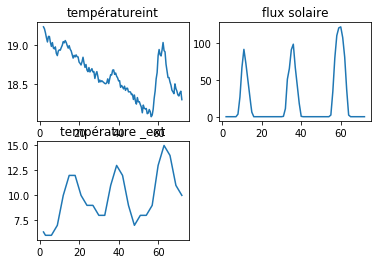

In [8]:
# Extraction des données
data = np.loadtxt('donnees-projet-gr4.txt')
data = data[3:] #même simplification que plus haut
heure = data.transpose()[0]
T_int = data.transpose()[1]
phi_sol = data.transpose()[2]
T_ext = data.transpose()[3]
plt.subplot((221))
plt.plot(heure,T_int)
plt.title('températureint')
plt.subplot((222))
plt.plot(heure,phi_sol)
plt.title('flux solaire')
plt.subplot(223)
plt.plot(heure,T_ext)
plt.title('température _ext')

In [9]:
def least_square(T_0,T_int, T_ext, phi_sol):
    def f(X):
        return (T_int-mod1(T_0,T_ext,phi_sol,0.5,X[0],0,X[1],X[2]))
    res = optimize.least_squares(f,[400,0.001,400], verbose = 1, method = 'lm')
    return res.x, res.cost
# La méthode est moins stable
res,cost = least_square(T_int[0],T_int,T_ext,phi_sol)
R,alpha,S_ext = res
print('cost',cost)
a = np.sqrt(S_ext/5)
V = a**3
C = 1256*V
#

`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 1.0071e+01, final cost 9.8959e-01, first-order optimality 7.92e-02.
cost 0.9895874898198811


In [10]:

print('===== \n')
print(' MODELISATION DE LA MAISON \n ')
print('Murs de résistance équivalente', R/(S_ext),'\n')
print('Surface extérieure', S_ext,'\n')
print('Cube de côté a :', np.sqrt(S_ext/5), 'm','\n')
print('Mur de résistance surfacique',R,'m^2KW^-1\n') 
print('Pourcentage du flux solaire chauffant la maison', alpha,'\n')
print('Capacité thermique de la maison', C,'JK^-1\n')


===== 

 MODELISATION DE LA MAISON 
 
Murs de résistance équivalente 0.7608983572190919 

Surface extérieure 478.3693072702498 

Cube de côté a : 9.781301623712968 m 

Mur de résistance surfacique 363.9904200459681 m^2KW^-1

Pourcentage du flux solaire chauffant la maison 0.0007668921947591089 

Capacité thermique de la maison 1175383.5098625598 JK^-1



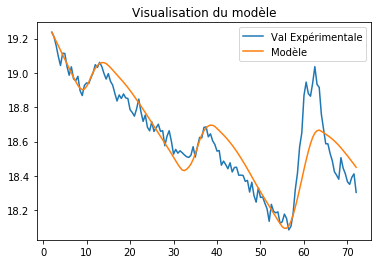

In [11]:
model2 = mod1(T_int[0],T_ext, phi_sol,0.5,R,C,alpha,S_ext)
fig, ax1 = plt.subplots()

ax1.plot(heure,T_int, label = "Val Expérimentale")
ax1.plot(heure,model2,label = 'Modèle')

ax1.legend()
plt.title('Visualisation du modèle')
plt.show()

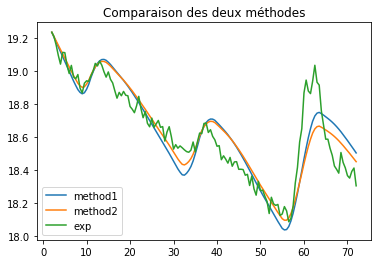

norme met2 1.4068315391829123


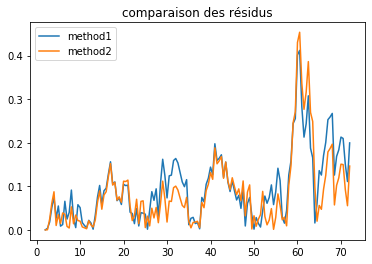

norme met1 1.4863105780228225


In [12]:
# Comparaison 
plt.plot(heure, model1[1:], label = 'method1')
plt.plot(heure, model2, label = 'method2')
plt.plot(heure, T_int, label = 'exp')
plt.legend()
plt.title('Comparaison des deux méthodes')
plt.show()
print('norme met2',np.linalg.norm(T_int - model2))
plt.plot(heure, abs(T_int - model1[1:]), label = 'method1')
plt.plot(heure, abs(T_int-model2), label = "method2")
plt.legend()
plt.title('comparaison des résidus')
plt.show()
print('norme met1',np.linalg.norm(T_int - model1[1:]))

On remarque que du **point de vue de l'approximation de la température** la seconde méthode est meilleure car plus proche de la température réelle. Cependant du **point de vue de l'approximation du modèle** cette méthode est plus **faibl**e en effet à terme la fonction de coût serait de 0.6 avec ces paramètres quand elle est de 0.1 avec les paramètres trouvés avec la première méthode (**Cela présuppose que l'on considère toute les valeurs de températures exactes**). Cependant elle est soumis à une incertitude du fait de l'erreur accumulée par méthode de Euler on lui préferera donc la première méthode. Les ordres de grandeurs des paramètres restent tout de même les mêmes. 
L'interet de la méthode 2 est que l'on converge en moins d'itérations que avec la méthode 1. 

On retrouve toujours les mêmes problèmes de paramètres.

### 4. Problème d'optimisation

On cherche maintenant à optimiser la consommation de façon à diminuer la facture d'électricité. Les contraintes physiques obligent **T à respecter la loi** que nous avons défini plus tôt (en $E$). De plus le radiateur consomme de l'electricité avec **une charge positive et inférieure à une charge maximale**. Enfin la condition de confort des usagers, est d'assurer une **température comprise entre une borne inférieure et supérieure** à toute heure de la journée.  

Le problème d'optimisation est donc après discrétisation :
$$ {min}_{(w_i), i\in {1,..,N}} P(x)= \sum_{i=1}^N{p}_i^{p/c}w_i\tau $$
s.t.
$$ 0 \leq w_i \leq w_{max} -(1-2) $$
$$  20 ° C \leq Ti \leq 21°C - (3-4)$$
$$ T  \ vérifie \ (E) \ sous \ les \ paramètres \ déterminées\ au \  I.\ -(5)$$